# Prosper Loan dataset 
>By Tofy Lemrabott
#### Introduction:
>In this project, I will be conducting an in-depth analysis of a dataset provided by Prosper, a Loan investment company. The dataset is in CSV format. For this analysis, I will utilize various libraries, including pandas, matplotlib, seaborn, and numpy, to effectively visualize the data and derive meaningful insights.

## Preliminary Wrangling

In [2]:
# import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv('Prosper_Loan.csv')
df.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,14/08/2009 00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,17/12/2009 00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,26:37.1,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,52:56.1,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,49:27.5,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,43:39.1,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,43:39.1,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

###  the structure of the dataset:

> The dataset consists of 113,937 loans, each with 81 variables. These variables include loan amount, borrower rate, current loan status, borrower income, and more.

### The main features of interest in the dataset:

> This project primarily focuses on specific attributes within the loan dataset, and each attribute is accompanied by a corresponding description. These key attributes and their descriptions are as follows:
ListingKey : Unique key for each listing, same value as the 'key' used in the listing object in the API.
CreditGrade: The Credit rating that was assigned at the time the listing went live. Applicable for listings pre- 2009 period and will only be populated for those listings.
LoanStatus : The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
BorrowerAPR : The Borrower's Annual Percentage Rate (APR) for the loan.
BorrowerRate : The Borrower's interest rate for this loan.
LenderYield: The Lender yield on the loan. Lender yield is equal to the interest rate on the loan less the servicing fee.
Occupation : The Occupation selected by the Borrower at the time they created the listing.
EmploymentStatus : The employment status of the borrower at the time they posted the listing.
CurrentDelinquencies : Number of accounts delinquent at the time the credit profile was pulled.
StatedMonthlyIncome : The monthly income the borrower stated at the time the listing was created.

###  The features in the dataset I think will help support my investigation into the features of interest are:
>
The interest rate
Monthly income of the borrower
Loan Status
Occupation of the borrower
Credit grade of the loan
Prosper loan's yield

In [27]:
# Generate a list containing the columns relevant for this project analysis.

In [29]:
list =['ListingKey', 'CreditGrade', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'Occupation', 'EmploymentStatus', 'CurrentDelinquencies', 'StatedMonthlyIncome']
list

['ListingKey',
 'CreditGrade',
 'LoanStatus',
 'BorrowerAPR',
 'BorrowerRate',
 'LenderYield',
 'Occupation',
 'EmploymentStatus',
 'CurrentDelinquencies',
 'StatedMonthlyIncome']

In [52]:
## generate a subset dataframe:
subset_df= df[list]
subset_df.head(5)

,ListingKey,CreditGrade,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,Occupation,EmploymentStatus,CurrentDelinquencies,StatedMonthlyIncome
0,1021339766868145413AB3B,C,Completed,0.16516,0.1580,0.1380,Other,Self-employed,2.0,3083.333333
1,10273602499503308B223C1,NaN,Current,0.12016,0.0920,0.0820,Professional,Employed,0.0,6125.000000
2,0EE9337825851032864889A,HR,Completed,0.28269,0.2750,0.2400,Other,Not available,1.0,2083.333333
3,0EF5356002482715299901A,NaN,Current,0.12528,0.0974,0.0874,Skilled Labor,Employed,4.0,2875.000000
4,0F023589499656230C5E3E2,NaN,Current,0.24614,0.2085,0.1985,Executive,Employed,0.0,9583.333333


## Univariate Exploration

> The following univariate analysis will be done to gain insights on the demographics of the customers at Prosper Loan:
What is the employment statuses of the borrowers?
What are the most common occupations among borrowers of Prosper Loan?
What is the distribution of loan statuses within Prosper Loan's portfolio? 


In [7]:
## What is the employment status of the borrowers?

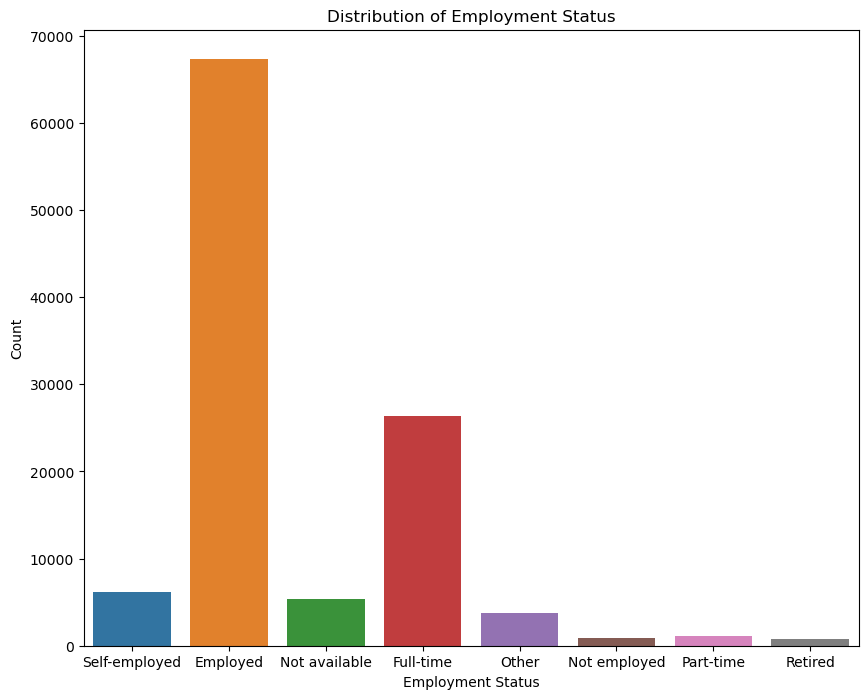

In [65]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(data=subset_df, x='EmploymentStatus')
ax.set_xlabel('Employment Status')
ax.set_ylabel('Count')
ax.set_title('Distribution of Employment Status');

The employment status distribution in the Prosper Loan dataset reveals that the majority of borrowers are employed, including full-time, part-time, and self-employed individuals. Some borrowers have missing or unreported employment status, while others are actively seeking employment.

In [11]:
## What are the most common occupation amongst borrowers of Prosper Loan?

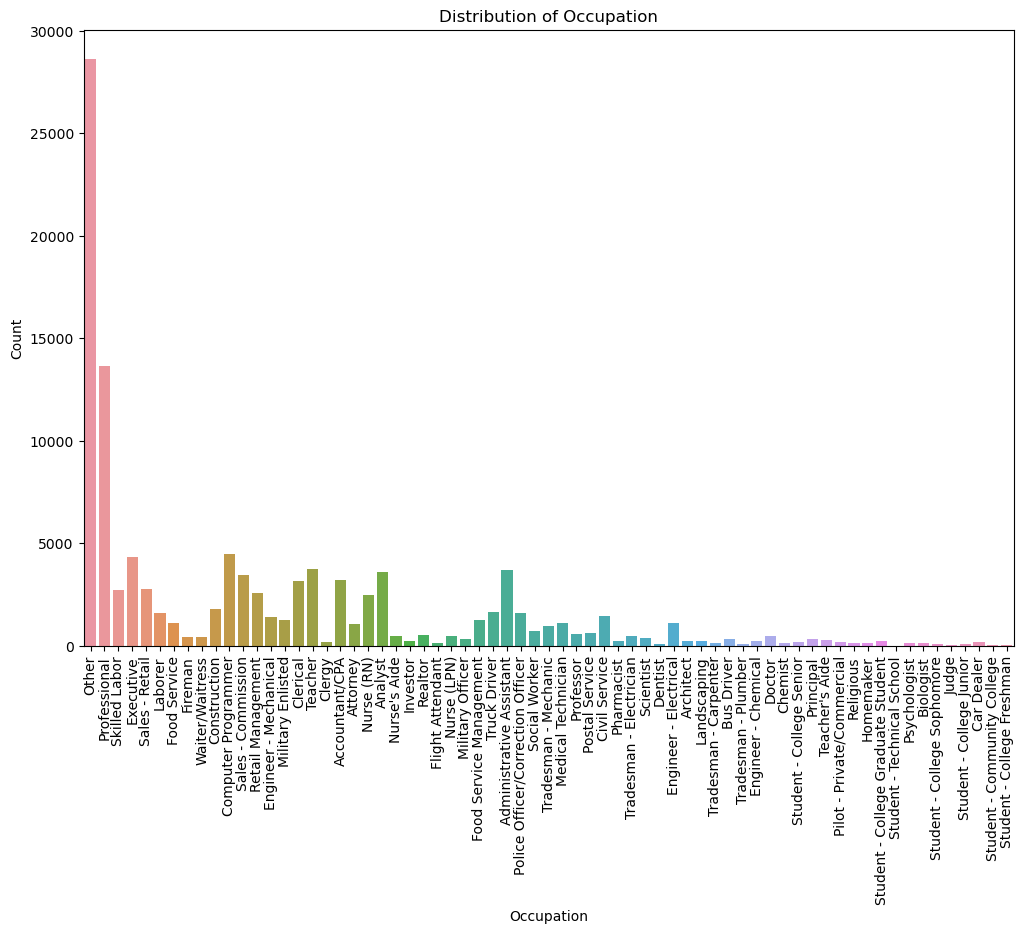

In [63]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=subset_df, x='Occupation')
ax.set_xlabel('Occupation')
ax.set_ylabel('Count')
ax.set_title('Distribution of Occupation')
plt.xticks(rotation=90);

Borrowers in the Prosper Loan dataset represent a variety of occupations, including computer programming, administration, teaching, sales, executive roles, electrical engineering, and construction. This reflects the diverse range of professional roles within the borrowing population.

In [15]:
## What is the distribution of loan statuses within Prosper Loan's portfolio?

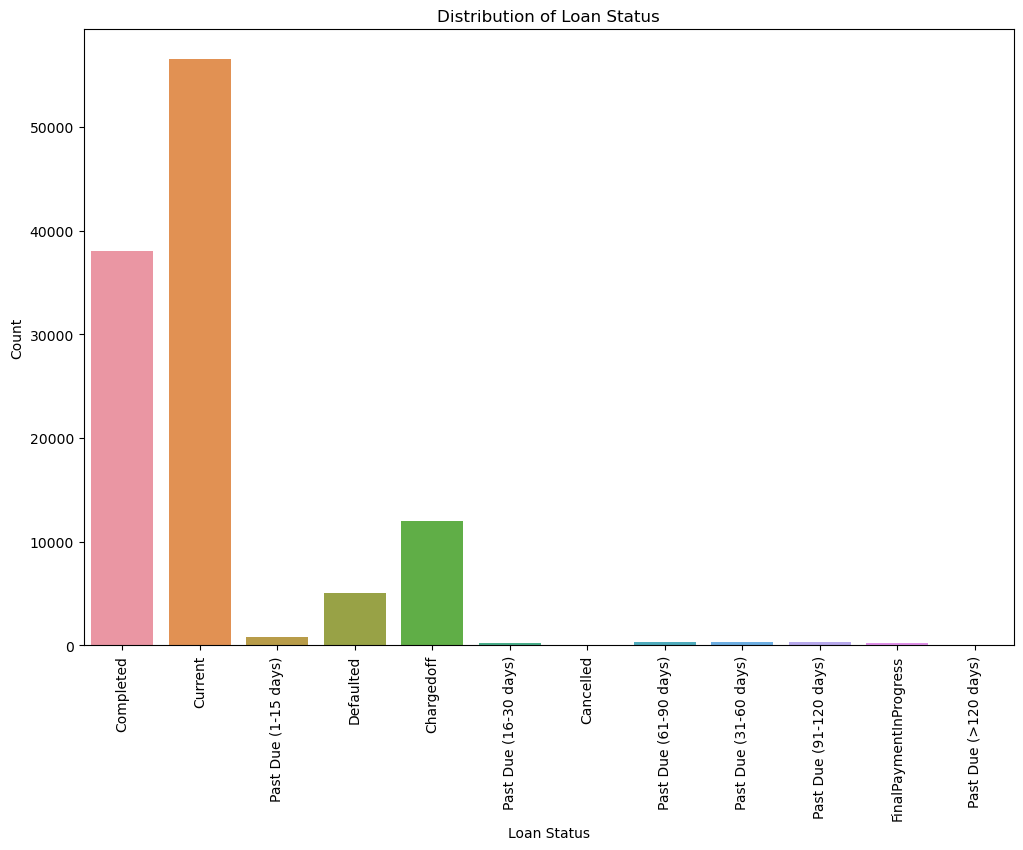

In [64]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=subset_df, x='LoanStatus')
ax.set_xlabel('Loan Status')
ax.set_ylabel('Count')
ax.set_title('Distribution of Loan Status')
plt.xticks(rotation=90);

This distribution of loan statuses provides insights into the current state of loans in terms of their repayment status. It indicates the number of loans that have been cancelled, charged off, completed, or are in various stages of repayment, as well as the number of loans that have defaulted or are past due at different intervals. This analysis can help understand the overall loan portfolio and identify potential areas of concern, such as loans in default or with significant delinquencies.

## Bivariate Exploration

The following bivariate analysis will be done to gain insights on the relationship between quantitative variables:

-How does the borrower rate (interest rate) correlate with the lender's yield?
-What is the relationship between delinquent accounts and interest rates in Prosper Loan's portfolio?
-How does the monthly income of borrowers correlate with the credit grade assigned to their loans?

In [17]:
## How does the borrower rate (interest rate) correlate with the lender's yield?

In [51]:
## plot a scatter plot with a regression line using the Seaborn library 

<AxesSubplot:xlabel='BorrowerRate', ylabel='LenderYield'>

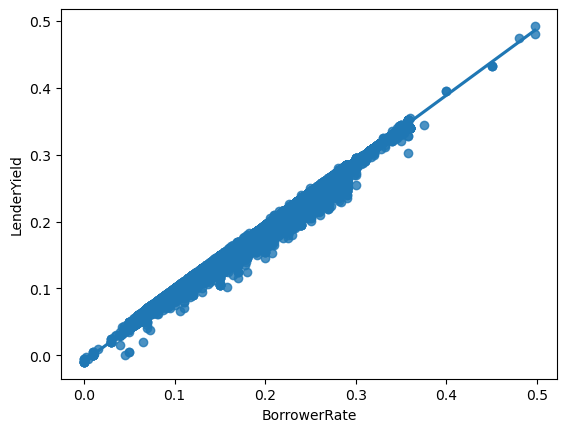

In [66]:
sns.regplot(data=subset_df,x='BorrowerRate', y='LenderYield')

The upward diagonal line observed in the scatter plot above between "BorrowerRate" (interest rate) and "Lender's Yield" (interest rate minus servicing fee) suggests a positive relationship between the two variables. Below outlines a few possible analyses based on this observation:
Positive correlation: The scatter plot's upward diagonal line indicates a positive correlation between "BorrowerRate" and "Lender's Yield." It suggests that as the interest rate for borrowers increases, the lender's yield also tends to increase. This relationship implies that loans with higher interest rates also provide higher yields for lenders.

In [19]:
## What is the relationship between delinquent accounts and interest rates in Prosper Loan's portfolio?

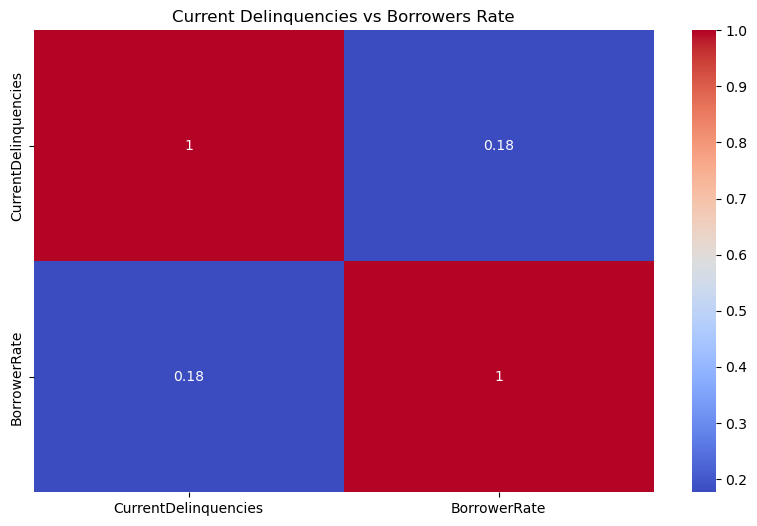

In [46]:
plt.figure(figsize=(10, 6))
sns.heatmap(data=subset_df[['CurrentDelinquencies', 'BorrowerRate']].corr(), annot=True, cmap='coolwarm')
plt.title('Current Delinquencies vs Borrowers Rate')
plt.show()

The output of the correlation heatmap above suggests a positive correlation of approximately 0.18 between the variables "CurrentDelinquencies" and "BorrowerRate". Outlined below are some possible analyses based on this relationship:

Weak positive correlation: The correlation coefficient of 0.18 indicates a weak positive correlation between "CurrentDelinquencies" and "BorrowerRate". This means that there is a slight tendency for the two variables to move together but the relationship is not very strong. As "CurrentDelinquencies" increase, there is a small tendency for "BorrowerRate" to also increase.

Potential risk assessment: The positive correlation suggests that there may be a connection between delinquency rates and the interest rates offered to borrowers. A higher number of current delinquencies may be an indication of increased risk leading to lenders offering higher interest rates to compensate for the potential default or late payments. This analysis suggests that Prosper Loan might adjust interest rates based on the level of delinquencies in the loan portfolio.

Limited impact: Since the correlation coefficient is relatively low, it indicates that "CurrentDelinquencies" have a modest influence on the "BorrowerRate". Other factors, such as creditworthiness, loan terms or market conditions may have a more significant impact on determining the interest rates offered to borrowers.
Remember, correlation does not imply causation. The observed correlation between "CurrentDelinquencies" and "BorrowerRate" suggests an association but it does not necessarily mean that one variable directly causes changes in the other. Further investigation and analysis are required to draw more definitive conclusions about the relationship between these variables.

In [21]:
# How does the monthly income of borrowers correlate with the credit grade assigned to their loans?

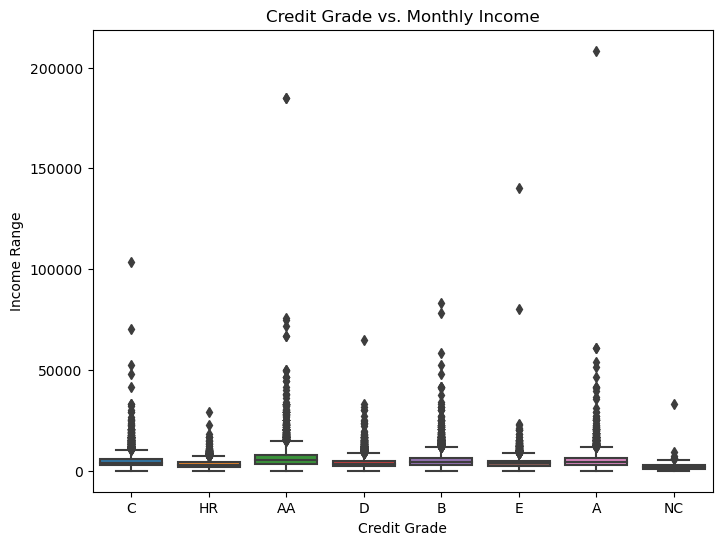

In [59]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=subset_df, x='CreditGrade', y='StatedMonthlyIncome')
plt.xlabel('Credit Grade')
plt.ylabel('Income Range')
plt.title('Credit Grade vs. Monthly Income')
plt.show()

The following are some observations from the box plot above:

Credit Grade C: The majority of data points for this credit grade are centered around 50,000 monthly income indicating that borrowers in this category generally have a consistent income level. There is one outlier above 100,000, suggesting that some borrowers with Credit Grade C may have relatively higher incomes.

Credit Grade HR: The majority of data points for this credit grade are below 40,000 monthly income, indicating that borrowers in this category generally have lower incomes. This suggests that borrowers with Credit Grade HR may have higher risk profiles based on their income levels.

Credit Grade AA: The majority of data points for this credit grade are below or around 50,000 monthly income. However, there are a few data points below 100,000 and one data point above 150,000 suggesting some variability in income levels for borrowers with Credit Grade AA.

Credit Grade D: The majority of data points for this credit grade are below 50,000 monthly income, similar to Credit Grade AA. However, there is one outlier above 50,000, indicating that some borrowers in this category may have higher incomes.

Credit Grade B: The majority of data points for this credit grade are below or around 50,000 monthly income, similar to Credit Grades AA and D. There is one data point slightly above 50,000 suggesting a slightly higher income level for some borrowers in this category.

Credit Grade E: The majority of data points for this credit grade are below 30,000 monthly income, indicating that borrowers in this category generally have lower incomes. However, there are two data points below 100,000 and one data point below 150,000 suggesting some variability in income levels.

Credit Grade A: The majority of data points for this credit grade are below or around $50,000 monthly incomesimilar to Credit Grades AA, B, and D. There is one data point above 200,000 indicating that some borrowers in this category may have significantly higher incomes.

Credit Grade NC: The majority of data points for this credit grade are below 20,000 monthly income, indicating that borrowers in this category generally have lower incomes. However, there is one data point at 30,000 suggesting some variability.

Overall, the box plot analysis provides insights into the distribution of monthly income points across different credit grades. It highlights the income levels associated with each credit grade and allows for comparisons and identification of potential patterns. It suggests that income plays a role in determining credit grades with some variations observed within certain credit grade categories.

## Conclusions

In conclusion, the analysis of the Prosper Loan dataset reveals several key observations and insights:
Employment Status: The majority of borrowers are employed, with a significant portion engaged in full-time employment.

Occupations: The dataset includes diverse occupations, with the largest category labeled as "Other." This suggests the presence of various occupations not explicitly listed. Additionally, there is a notable representation of professionals in fields such as computer programming, administration, teaching, sales, executive positions, electrical engineering and construction. This distribution provides an overview of the main occupational groups represented among the borrowers.

Loan Statuses: The loan statuses indicate the current state of loans in terms of repayment. The largest category is "Current," representing loans that are active and being repaid according to the agreed-upon terms. This analysis helps understand the overall loan portfolio and identify potential areas of concern.

Borrower Rate and Lender's Yield: There is a positive correlation between borrower rates and lender's yields suggesting that higher interest rates result in higher yields for lenders. The pricing strategy employed by Prosper Loan seems to adjust both the interest rate and servicing fee in combination.

Current Delinquencies and Borrower Rate: A weak positive correlation exists between current delinquencies and borrower rates. This suggests a potential connection between delinquency rates and the interest rates offered to borrowers, with higher delinquencies possibly leading to higher interest rates. However, the impact of current delinquencies on borrower rates appears to be limited compared to other factors such as creditworthiness and market conditions.

Credit Grades and Monthly Income: The box plot analysis of credit grades and monthly income indicates income levels associated with each credit grade. There are variations within certain credit grade categories but generally, lower credit grades tend to be associated with lower incomes while higher credit grades are associated with higher incomes. Some credit grades show consistent income levels while others exhibit variability and outliers.

Overall, these observations provide valuable insights into the composition of the borrowing population, their employment status, occupations, loan statuses, interest rates and income levels. They contribute to a better understanding of the Prosper Loan dataset and can inform further analysis and decision-making related to loan portfolio management, risk assessment and pricing strategies.
